# Artifical Neural Network (PyTorch)

We will start off by constructing a neural networks from scratch to get a stronger understanding of what is required to make neural networks work.

Then in the second part of the lab we will train a neural network (using PyTorch) to classify an image into one of two classes: "car" or "truck". The code for the neural networks 

1. Understand at a high level the training loop for a machine learning model.
2. Understand the distinction between training, validation, and test data.
3. The concepts of overfitting and underfitting.
4. Investigate how different hyperparameters, such as learning rate and batch size, affect the success of training.
5. Compare an ANN (aka Multi-Layer Perceptron) with a CNN.
 

#PART A: Constructing a Neural Network 

Before we get into using PyTorch to train our classifier we will go through the process of creating our neural network from scratch. We know how to build a 1-layer network, now we'll take it one step further to build a 2-layer network. This is an important exercise that everyone should attempt at least once to understand and truly appreciate the workings of neural networks.

## Part 0. Helper Functions

To help guide the construction we will use the iris dataset. Provided are some helper code to get us started:

In [1]:
# load "Iris_3class.csv" to Google Colab
from google.colab import files
uploaded = files.upload()

Saving Iris_3class.csv to Iris_3class.csv


In [2]:
import pandas as pd
raw_data = pd.read_csv("Iris_3class.csv", header = None)
raw_data.values.shape

(150, 5)

In [3]:
raw_data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
import numpy as np
raw_data = raw_data.values

X_train = raw_data[:,:4]
y_train = raw_data[:,4:5].astype(int)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

(150, 4) (150, 1)
float64 int64


Recall that the neural network output consists of several nodes, one for each output class. Since the labels are provided as integers we will need to convert them into one-hot vectors to match the neural network output format.

In [5]:
#Convert array to one-hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [6]:
y_train = to_one_hot(y_train)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

(150, 4) (150, 3)
float64 float64


In [7]:
#verify one-hot encoding
y_train[0:5,:]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

### Part 1. Develop a 2-layer ANN 
At its core a 2-layer neural network is just a few lines of code. Most of the complexity comes from setting up the training of the network.

Using vectorized form, set up the neural network training to use a cross-entropy loss function and determine the gradients with resepect to the layer 1 and layer 2 weights.

In [8]:
# write code to create a 2-layer ANN in vectorized form

#define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

#define softmax
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / exp_x.sum(axis=1, keepdims=True)



def ann(W, X_train, y_train):
    num_hidden = 5
    num_features = 4
    num_outputs = 3

  #Weights
    w0 = W[:20].reshape(num_features, num_hidden)
    w1 = W[20:].reshape(num_hidden, num_outputs)
    
   #bias
    #b0= np.random.randn(num_hidden)
    #b1= np.random.randn(num_outputs)
    
  #Feed forward
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))#+b0)
    #layer2 = sigmoid(np.dot(layer1, w1)) 
  
  # softmax
    output = softmax(np.dot(layer1, w1))#+b1)  # TO BE COMPLETED
 
  #Back propagation using gradient descent
  
  #cross-entropy loss
    error = -(np.sum(y_train*np.log(output)))/y_train.shape[0] # TO BE COMPLETED
    
    
  #initialize gradients to zero 
    dw0=  np.zeros(w0.shape)
    dw1 = np.zeros(w1.shape)     # TO BE COMPLETED

  #calculate partial derivatives
  # TO BE COMPLETED
    
    #Layer2
    dcost_dz1 = output - y_train
    dz1_dw1 = layer1

    dcost_w1 = np.dot(layer1.T,dcost_dz1) #weight

   # dcost_b1 = dcost_dz1   #bias
    
    #layer 1
    dz1_dlayer1 = w1
    dcost_dlayer1 = np.dot(dcost_dz1,w1.T)
    dlayer1_dlayer0= sigmoid_der(np.dot(layer0, w0))
    dlayer0_dw0 = layer0

    dcost_w0 = np.dot(layer0.T,dlayer1_dlayer0*dcost_dlayer1) #weight

    # dcost_b0 = dcost_dlayer1* dlayer1_dlayer0   #bias
  
    #determine gradients
    dw1 += dcost_w1 # TO BE COMPLETED
    dw0 += dcost_w0 # TO BE COMPLETED
  
  #combine gradients into one vector
    dW = np.array(list(dw0.flatten()) + list(dw1.flatten()))  # TO BE COMPLETED

    return (error, dW, output)


### Part 2. Train your neural network. How well does your network work on the iris dataset? 

In [9]:
num_hidden = 5
num_features = 4
num_outputs = 3
  
#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights into a single vector
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#train network
n = 0.001
iterations = 100000
errors = []
for i in range(iterations):
    (error, dW, y_pred) = ann(W, X_train, y_train)
    W += -dW * n
    errors.append(error)


In [10]:
#examine predictions on training data
np.round(y_pred, 1)

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. 

### Part 3. Validate that the gradients were computed correctly for the 2-layer neural network you developed. 

In [11]:
#write code to numerical verify the gradients you calculated

num_hidden = 5
num_features = 4
num_outputs = 3
  
#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights
W = np.array(list(w0.flatten()) + list(w1.flatten()))        # TO BE COMPLETED

#compute gradients analytically
(error, dW, y_pred) = ann(W, X_train, y_train)
dW /= len(y_train)

#compute gradients numerically
dW_num = np.zeros((len(W),1))

for ind in range(len(W)):
  #reset gradients
  We1 = np.array(list(w0.flatten()) + list(w1.flatten()))
  We2 = np.array(list(w0.flatten()) + list(w1.flatten()))
  
  #increment slightly
  We1[ind] =  We1[ind] +  0.0001       #TO BE COMPLETED
  We2[ind] =  We2[ind] -  0.0001       # TO BE COMPLETED
  
  #compute errors
  (error_e1, dW_e1, y_pred1) = ann(We1, X_train, y_train)
  (error_e2, dW_e2, y_pred2) = ann(We2, X_train, y_train)
  
  #obtain numerical gradients
  grad_num = (error_e1-error_e2)/0.0002            # TO BE COMPLETED
  
  #display difference between numerical and analytic gradients
  print(np.round(abs(grad_num - dW[ind]), 4),grad_num , dW[ind])


0.0 -0.08870605825772593 -0.08870606728139162
0.0 0.05475066798599215 0.054750667997546916
0.0 0.06420426063691309 0.06420425766342135
0.0 -0.0022833990698245543 -0.002283398993716997
0.0 0.0007955665470849027 0.0007955664969982759
0.0 -0.05685395866539267 -0.05685395940138257
0.0 0.04202074790682353 0.04202074762369343
0.0 0.01805155104839251 0.018051551183331106
0.0 -0.0016114685585932875 -0.0016114685313242934
0.0 5.492539645324257e-05 5.4925402638881587e-05
0.0 -0.014027543261407871 -0.014027548489932814
0.0 0.006030087716935029 0.006030088240262859
0.0 0.07988321876317706 0.07988321619708465
0.0 -0.0005608672548618188 -0.0005608672579901361
0.0 0.0010586774124021758 0.001058677391845172
0.0 0.007934441329515707 0.007934441069998568
0.0 -0.0017271577890110024 -0.0017271577667017101
0.0 0.031610207897880827 0.03161020777162854
0.0 -6.210132963424542e-05 -6.21013291644072e-05
0.0 0.0003237949941503615 0.0003237949933385356
0.0 -0.05439273638052633 -0.05439273637815724
0.0 0.019308218

#### Since the difference between the numerical and the analytical gradients are theoritically zero , we can say that analytical gradient is calculated correctly. 

# PART B: Cars vs Trucks 

In the second part of the lab we will see how we can use PyTorch to train a neural network to identify Cars and Trucks.

In [12]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms


## Part 0. Helper Functions

We will be making use of the following helper functions. You will be asked to look
at and possibly modify some of these, but you are not expected to understand all of them.


In [13]:
###############################################################################
# Data Loading

def get_relevant_indices(dataset, classes, target_classes):
    """ Return the indices for datapoints in the dataset that belongs to the
    desired target classes, a subset of all possible classes.

    Args:
        dataset: Dataset object
        classes: A list of strings denoting the name of each class
        target_classes: A list of strings denoting the name of desired classes
                        Should be a subset of the 'classes'
    Returns:
        indices: list of indices that have labels corresponding to one of the
                 target classes
    """
    indices = []
    for i in range(len(dataset)):
        # Check if the label is in the target classes
        label_index = dataset[i][1] # ex: 9
        label_class = classes[label_index] # ex: 'truck'
        if label_class in target_classes:
            indices.append(i)
    return indices

def get_data_loader(target_classes, batch_size):
    """ Loads images of cars and trucks, splits the data into training, validation
    and testing datasets. Returns data loaders for the three preprocessed datasets.

    Args:
        target_classes: A list of strings denoting the name of the desired
                        classes. Should be a subset of the argument 'classes'
        batch_size: A int representing the number of samples per batch
    
    Returns:
        train_loader: iterable training dataset organized according to batch size
        val_loader: iterable validation dataset organized according to batch size
        test_loader: iterable testing dataset organized according to batch size
        classes: A list of strings denoting the name of each class
    """

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    ########################################################################
    # The output of torchvision datasets are PILImage images of range [0, 1].
    # We transform them to Tensors of normalized range [-1, 1].
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # Load CIFAR10 training data
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_indices = get_relevant_indices(trainset, classes, target_classes)
    
    # Split into train and validation
    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(relevant_indices)
    split = int(len(relevant_indices) * 0.8) #split at 80%
    
    # split into training and validation indices
    relevant_train_indices, relevant_val_indices = relevant_indices[:split], relevant_indices[split:]  
    train_sampler = SubsetRandomSampler(relevant_train_indices)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               num_workers=1, sampler=train_sampler)
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    val_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)
    # Load CIFAR10 testing data
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_test_indices = get_relevant_indices(testset, classes, target_classes)
    test_sampler = SubsetRandomSampler(relevant_test_indices)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             num_workers=1, sampler=test_sampler)
    return train_loader, val_loader, test_loader, classes

###############################################################################
# Training
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to 0/1 value
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels

def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        loss = criterion(outputs, labels.float())
        corr = (outputs > 0.0).squeeze().long() != labels
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

###############################################################################
# Training Curve
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

## Part 1. Visualizing the Data 

We will make use of some of the CIFAR-10 data set, which consists of 
colour images of size 32x32 pixels belonging to 10 categories. You can
find out more about the dataset at https://www.cs.toronto.edu/~kriz/cifar.html

Over here, we will only be using the car and truck categories. 
We have included code that automatically downloads the dataset the 
first time that the main script is run.

In [14]:
# This will download the CIFAR-10 dataset to a folder called "data"
# the first time you run this code.
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"], 
    batch_size=1) # One image per batch

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Part (a) 

Visualize some of the data by running the code below.


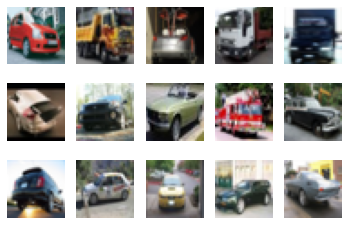

In [15]:
import matplotlib.pyplot as plt

k = 0
for images, labels in train_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

Since the batch size is selected to 1, thats why there is one image out of 14 iterations thats been used in the loop. The images consist of trunks and cars pictures

### Part (b) 

How many training examples do we have for the combined `car` and `truck` classes? 
What about validation examples? 
What about test examples?

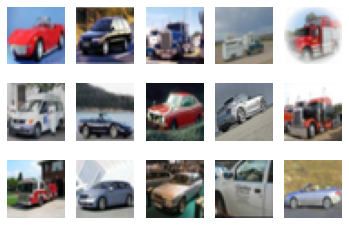

In [16]:
k = 0
for images, labels in val_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

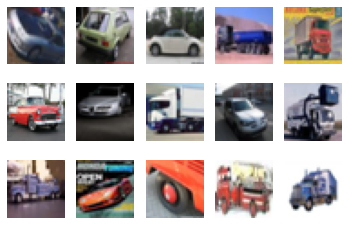

In [17]:
k = 0
for images, labels in test_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

In [18]:
len(train_loader),len(val_loader),len(test_loader)

(8000, 2000, 2000)

In total we have 8000 training samples, 2000 validation samples and 2000 test samples

### Part (c) 

Why do we need a validation set when training our model? What happens if we judge the 
performance of our models using the training set loss/error instead of the validation
set loss/error?

1. We need a validation set to train our model just to make sure that there is no noise got involved in the model training due to test samples and test samples should be totally isolated and should work independently whne put into the trained model.

2. Training set is used to train the model and not to validate the output. Validation set is used to check if the model is trained correctly wrt to fitting and further tells us to modify the training paramters.

## Part 2. Training 

We define two neural networks, a `LargeNet` and `SmallNet`.
We'll be training the networks in this section.


In [19]:
class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 5 * 5, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [20]:
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.name = "small"
        self.conv = nn.Conv2d(3, 5, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(5 * 7 * 7, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = self.pool(x)
        x = x.view(-1, 5 * 7 * 7)
        x = self.fc(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [21]:
small_net = SmallNet()
large_net = LargeNet()

### Part (a)

The methods `small_net.parameters()` and `large_net.parameters()`
produces an iterator of all the trainable parameters of the network.
These parameters are torch tensors containing many scalar values. 

We haven't learned how how the parameters in these high-dimensional
tensors will be used, but we should be able to count the number
of parameters. Measuring the number of parameters in a network is
one way of measuring the "size" of a network.

What is the total number of parameters in `small_net` and in
`large_net`? (Hint: how many numbers are in each tensor?)

In [22]:
for param in small_net.parameters():
    print(param.shape)
    #print(param)

torch.Size([5, 3, 3, 3])
torch.Size([5])
torch.Size([1, 245])
torch.Size([1])


In [23]:
pytorch_total_params_small = sum(p.numel() for p in small_net.parameters())
print("The total number of parameter in small net :" ,pytorch_total_params_small)

The total number of parameter in small net : 386


In [24]:
for param in large_net.parameters():
    print(param.shape)
    #print(param)

torch.Size([5, 3, 5, 5])
torch.Size([5])
torch.Size([10, 5, 5, 5])
torch.Size([10])
torch.Size([32, 250])
torch.Size([32])
torch.Size([1, 32])
torch.Size([1])


In [25]:
pytorch_total_params_large = sum(p.numel() for p in large_net.parameters())
print("The total number of parameter in large net :" ,pytorch_total_params_large)

The total number of parameter in large net : 9705


### The function train_net

The function `train_net` below takes an untrained neural network (like `small_net` and `large_net`) and
several other parameters. You should be able to understand how this function works.
The figure below shows the high level training loop for a machine learning model:

![alt text](https://github.com/UTNeural/Lab2/blob/master/Diagram.png?raw=true)

In [26]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on cars vs trucks
    target_classes = ["car", "truck"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            target_classes, batch_size)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            labels = normalize_label(labels) # Convert labels to 0/1
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            corr = (outputs > 0.0).squeeze().long() != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

### Part (b)

The parameters to the function `train_net` are hyperparameters of our neural network.
We made these hyperparameters easy to modify so that we can tune them later on. 

What are the default values of the parameters `batch_size`, `learning_rate`, 
and `num_epochs`?

### Default values are:
batch_size=64, learning_rate=0.01, num_epochs=30

### Part (c)

What files are written to disk when we call `train_net` with `small_net`, and train for 5 epochs? List
of all the files written to disk, and what information the files contain.

In [27]:
train_net(small_net, batch_size=64, learning_rate=0.01, num_epochs=5)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 1: Train err: 0.352625, Train loss: 0.6224103808403015 |Validation err: 0.32, Validation loss: 0.5941702304407954
Epoch 2: Train err: 0.27475, Train loss: 0.5508059763908386 |Validation err: 0.2545, Validation loss: 0.510679199360311
Epoch 3: Train err: 0.22825, Train loss: 0.49158947229385375 |Validation err: 0.221, Validation loss: 0.47685663029551506
Epoch 4: Train err: 0.222125, Train loss: 0.4720060639381409 |Validation err: 0.209, Validation loss: 0.45876071229577065
Epoch 5: Train err: 0.201125, Train loss: 0.446240318775177 |Validation err: 0.2045, Validation loss: 0.4423696529120207
Finished Training
Total time elapsed: 11.88 seconds


## Files names are:
model_small_bs64_lr0.01_epoch0

model_small_bs64_lr0.01_epoch1

model_small_bs64_lr0.01_epoch2

model_small_bs64_lr0.01_epoch3

model_small_bs64_lr0.01_epoch4

model_small_bs64_lr0.01_epoch4_train_err.csv

model_small_bs64_lr0.01_epoch4_train_loss.csv

model_small_bs64_lr0.01_epoch4_val_err.csv

model_small_bs64_lr0.01_epoch4_val_loss.csv

First 5 files looks like cache file, but the last four files are the CSV files stroing the information for the error and loss values of the training and validation set respectively


### Part (d) 

Train both `small_net` and `large_net` using the function `train_net` and its default parameters.
The function will write many files to disk, including a model checkpoint (saved values of model weights) 
at the end of each epoch.

If you are using Google Colab, you will need to mount Google Drive 
so that the files generated by `train_net` gets saved. We will be using
these files in part (d).


Report the total time elapsed when training each network. Which network took longer to train?
Why?

In [28]:
# Since the function writes files to disk, you will need to mount
# your Google Drive. If you are working on the lab locally, you
# can comment out this code.

#from google.colab import drive
#drive.mount('/content/gdrive')

In [29]:
train_net(small_net, batch_size=64, learning_rate=0.01, num_epochs=30)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.1935, Train loss: 0.4315749604701996 |Validation err: 0.1945, Validation loss: 0.4343103105202317
Epoch 2: Train err: 0.187375, Train loss: 0.424621244430542 |Validation err: 0.194, Validation loss: 0.4303173068910837
Epoch 3: Train err: 0.190375, Train loss: 0.4200268702507019 |Validation err: 0.19, Validation loss: 0.42312510032206774
Epoch 4: Train err: 0.1905, Train loss: 0.4205165505409241 |Validation err: 0.182, Validation loss: 0.4224558975547552
Epoch 5: Train err: 0.183625, Train loss: 0.40794791984558104 |Validation err: 0.1875, Validation loss: 0.42199691105633974
Epoch 6: Train err: 0.184, Train loss: 0.4078300874233246 |Validation err: 0.215, Validation loss: 0.4538325695320964
Epoch 7: Train err: 0.179125, Train loss: 0.39905694317817686 |Validation err: 0.182, Validation loss: 0.41537019051611423
Epoch 8: Train err: 0.170875, Train loss: 0.3927904747724533 |Validation err: 0

In [30]:
train_net(large_net, batch_size=64, learning_rate=0.01, num_epochs=30)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.442125, Train loss: 0.6842537097930909 |Validation err: 0.3715, Validation loss: 0.6515912394970655
Epoch 2: Train err: 0.36025, Train loss: 0.6343778252601624 |Validation err: 0.3675, Validation loss: 0.6392521932721138
Epoch 3: Train err: 0.3045, Train loss: 0.5766460337638855 |Validation err: 0.2565, Validation loss: 0.520563374273479
Epoch 4: Train err: 0.237375, Train loss: 0.4973254940509796 |Validation err: 0.213, Validation loss: 0.4593813121318817
Epoch 5: Train err: 0.201125, Train loss: 0.44038090562820437 |Validation err: 0.1975, Validation loss: 0.44913672003895044
Epoch 6: Train err: 0.18675, Train loss: 0.414472904086113 |Validation err: 0.1905, Validation loss: 0.42396795842796564
Epoch 7: Train err: 0.1645, Train loss: 0.37247654581069944 |Validation err: 0.1615, Validation loss: 0.38847313076257706
Epoch 8: Train err: 0.155, Train loss: 0.36048643791675566 |Validation err

### Large net took more time to train as the number of parameter is much more than the small net.

### Part (e) 

Use the function `plot_training_curve` to display the trajectory of the 
training/validation error and the training/validation loss.
You will need to use the function `get_model_name` to generate the
argument to the `plot_training_curve` function.

Do this for both the small network and the large network. 

In [31]:
#model_path = get_model_name("small", batch_size=??, learning_rate=??, epoch=29)

In [32]:
small_path = get_model_name('small', batch_size=64, learning_rate=0.01, epoch=29)

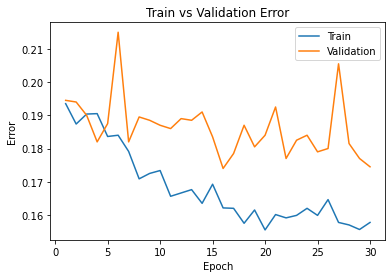

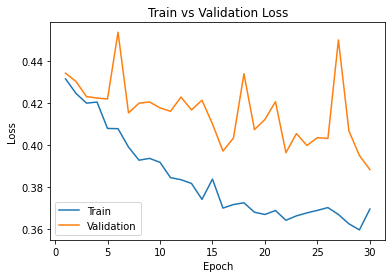

In [33]:
plot_training_curve(small_path)

In [34]:
large_path = get_model_name('large', batch_size=64, learning_rate=0.01, epoch=29)

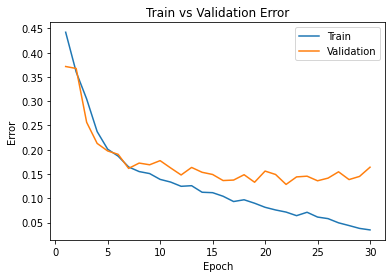

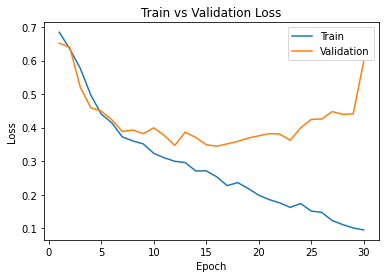

In [35]:
plot_training_curve(large_path)

### Part (f) 

Describe what you notice about the training curve.
How do the curves differ for `small_net` and `large_net`?
Identify any occurences of underfitting and overfitting.

In small network, its very difficult to say whether its a underfiited or overfitted model. Needs more batch size as its picking lot of noise.

In the large network, the tuned model looks overfitted with that number of epoch value. The sweet spot should be around 10 epoch.

## Part 3. Optimization Parameters 

For this section, we will work with `large_net` only.

### Part (a) 

Train `large_net` with all default parameters, except set `learning_rate=0.001`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *lowering* the learning rate.

In [36]:
# Note: When we re-construct the model, we start the training
# with *random weights*. If we omit this code, the values of
# the weights will still be the previously trained values.
large_net = LargeNet()

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.4585, Train loss: 0.6922090907096863 |Validation err: 0.4145, Validation loss: 0.6918484661728144
Epoch 2: Train err: 0.404, Train loss: 0.6912762846946716 |Validation err: 0.401, Validation loss: 0.6909310109913349
Epoch 3: Train err: 0.39125, Train loss: 0.6897973508834839 |Validation err: 0.3825, Validation loss: 0.6891596261411905
Epoch 4: Train err: 0.391, Train loss: 0.6871493906974793 |Validation err: 0.379, Validation loss: 0.6860427875071764
Epoch 5: Train err: 0.37275, Train loss: 0.6819084882736206 |Validation err: 0.3725, Validation loss: 0.6794121712446213
Epoch 6: Train err: 0.367, Train loss: 0.6722611894607544 |Validation err: 0.3745, Validation loss: 0.6701581478118896
Epoch 7: Train err: 0.367375, Train loss: 0.6595340538024902 |Validation err: 0.3785, Validation loss: 0.6627393439412117
Epoch 8: Train err: 0.364125, Train loss: 0.6492531847953796 |Validation err: 0.3765,

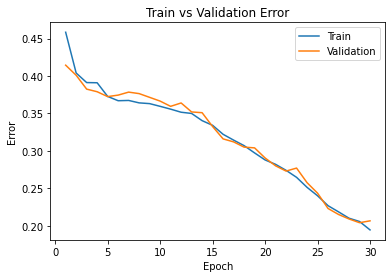

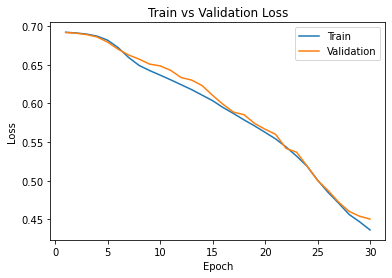

In [37]:
train_net(large_net, batch_size=64, learning_rate=0.001, num_epochs=30)
large_path1 = get_model_name('large', batch_size=64, learning_rate=0.001, epoch=29)
plot_training_curve(large_path1)

The model took longer to train when the learning rate is decreased. By lowering the learning rate, the model gives more error and loss value in the defined epoch value. Beside, It's an underfitted model as compared to the default values model.

### Part (b) 

Train `large_net` with all default parameters, except set `learning_rate=0.1`. 
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the learning rate.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.34475, Train loss: 0.6162742033004761 |Validation err: 0.325, Validation loss: 0.5957806976512074
Epoch 2: Train err: 0.27625, Train loss: 0.5558951270580291 |Validation err: 0.263, Validation loss: 0.5544741069898009
Epoch 3: Train err: 0.223375, Train loss: 0.4855300731658935 |Validation err: 0.2055, Validation loss: 0.4308580541983247
Epoch 4: Train err: 0.19325, Train loss: 0.4354436628818512 |Validation err: 0.18, Validation loss: 0.40178130846470594
Epoch 5: Train err: 0.17425, Train loss: 0.4035775926113129 |Validation err: 0.19, Validation loss: 0.42512505408376455
Epoch 6: Train err: 0.184625, Train loss: 0.41701974403858183 |Validation err: 0.2, Validation loss: 0.42960863653570414
Epoch 7: Train err: 0.166375, Train loss: 0.3872940249443054 |Validation err: 0.211, Validation loss: 0.4248463879339397
Epoch 8: Train err: 0.157, Train loss: 0.3690873725414276 |Validation err: 0.187

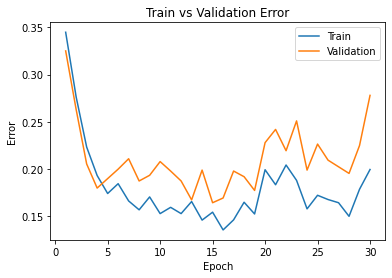

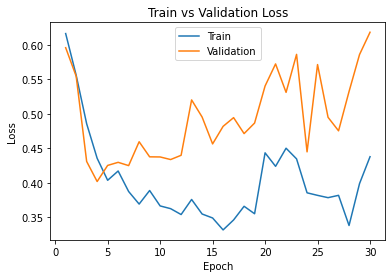

In [38]:
large_net = LargeNet()
train_net(large_net, batch_size=64, learning_rate=0.1, num_epochs=30)
large_path2 = get_model_name('large', batch_size=64, learning_rate=0.1, epoch=29)
plot_training_curve(large_path2)

The model take longer to train when the learning rate in increased. BY increasing the learning rate, the model become noisy and overfitted.

### Part (c) 

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=512`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the batch size.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.466, Train loss: 0.6923338547348976 |Validation err: 0.44, Validation loss: 0.6918952614068985
Epoch 2: Train err: 0.413, Train loss: 0.6914851702749729 |Validation err: 0.403, Validation loss: 0.6910877674818039
Epoch 3: Train err: 0.4035, Train loss: 0.6901152208447456 |Validation err: 0.3925, Validation loss: 0.6894860416650772
Epoch 4: Train err: 0.4, Train loss: 0.6876360848546028 |Validation err: 0.393, Validation loss: 0.6864032447338104
Epoch 5: Train err: 0.373625, Train loss: 0.682475633919239 |Validation err: 0.374, Validation loss: 0.6796957403421402
Epoch 6: Train err: 0.364375, Train loss: 0.6726637706160545 |Validation err: 0.3685, Validation loss: 0.6694191545248032
Epoch 7: Train err: 0.36475, Train loss: 0.6583150438964367 |Validation err: 0.3765, Validation loss: 0.6596953421831131
Epoch 8: Train err: 0.364875, Train loss: 0.6487297676503658 |Validation err: 0.38, Valida

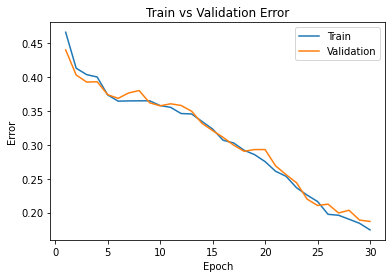

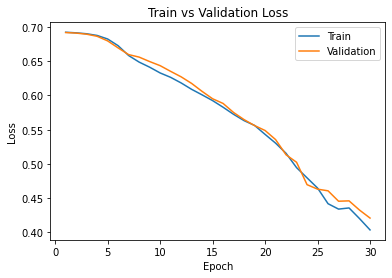

In [39]:
large_net = LargeNet()
train_net(large_net, batch_size=512, learning_rate=0.01, num_epochs=30)
large_path3 = get_model_name('large', batch_size=512, learning_rate=0.01, epoch=29)
plot_training_curve(large_path3)

The model took shorter time to train. By increasing the batch size, the model become underfitted and need more epoch value to further lower down the error and loss values.

### Part (d) 

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=16`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *decreasing* the batch size.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.345125, Train loss: 0.6188138083815574 |Validation err: 0.297, Validation loss: 0.5717946984767914
Epoch 2: Train err: 0.220875, Train loss: 0.4746331752538681 |Validation err: 0.2015, Validation loss: 0.4406975392103195
Epoch 3: Train err: 0.25275, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 4: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 5: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 6: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 7: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 8: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 9: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 10: Train err: 0.502375, Train l

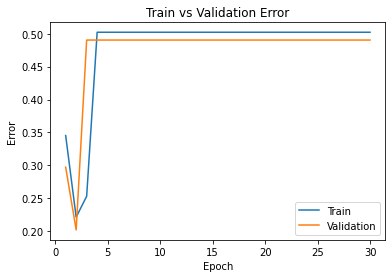

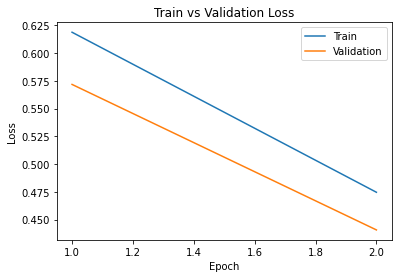

In [40]:
large_net = LargeNet()
train_net(large_net, batch_size=16, learning_rate=0.01, num_epochs=30)
large_path4 = get_model_name('large', batch_size=16, learning_rate=0.01, epoch=29)
plot_training_curve(large_path4)

The model took approximatly double the time to train. By decreasing the batch size, the model become so noisy and unreliable because of the nature of the training curves.

## Part 4. Hyperparameter Search 

### Part (a) 

Based on the plots from above, choose another set of values for the hyperparameters (network, batch_size, learning_rate)
that you think would help you improve the validation accuracy. Justify your choice.

Network: large, batch_size=512, learning_rate=0.001, epoch=30 looks to me should able to increase the validation accuracy. As batch size = 512 and learning rate 0.001 increases the accuracy score, taking reference from part a and part c from above.

### Part (b) 

Train the model with the hyperparameters you chose in part(a), and include the training curve.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.485875, Train loss: 0.6924984008073807 |Validation err: 0.472, Validation loss: 0.692221611738205
Epoch 2: Train err: 0.478375, Train loss: 0.6923949085175991 |Validation err: 0.4695, Validation loss: 0.692174568772316
Epoch 3: Train err: 0.46825, Train loss: 0.6923299096524715 |Validation err: 0.459, Validation loss: 0.6920875608921051
Epoch 4: Train err: 0.4585, Train loss: 0.69223328307271 |Validation err: 0.443, Validation loss: 0.6920361071825027
Epoch 5: Train err: 0.449375, Train loss: 0.6921333819627762 |Validation err: 0.441, Validation loss: 0.6919640898704529
Epoch 6: Train err: 0.438875, Train loss: 0.6920301467180252 |Validation err: 0.433, Validation loss: 0.6918835043907166
Epoch 7: Train err: 0.429875, Train loss: 0.6919135674834251 |Validation err: 0.421, Validation loss: 0.6918077170848846
Epoch 8: Train err: 0.42025, Train loss: 0.691812664270401 |Validation err: 0.4065,

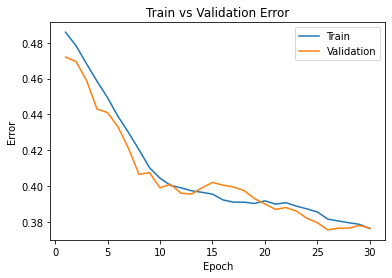

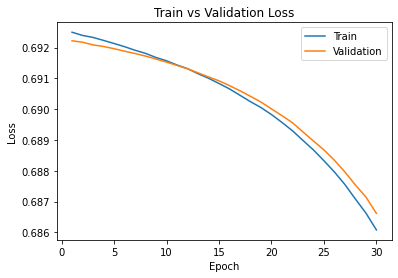

In [41]:
large_net = LargeNet()
train_net(large_net, batch_size=512, learning_rate=0.001, num_epochs=30)
large_path5 = get_model_name('large', batch_size=512, learning_rate=0.001, epoch=29)
plot_training_curve(large_path5)

### Part (c) 

Based on your result from Part(a), suggest another set of hyperparameter values to try. 
Justify your choice.

Network:large, batch_size=265, learning_rate=0.01, epoch=29 as the error value does not reduced much but the plot are smoother than before and hiting the right bias for fitting.

### Part (d) 

Train the model with the hyperparameters you chose in part(c), and include the training curve.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.4405, Train loss: 0.691989853978157 |Validation err: 0.4, Validation loss: 0.6910461708903313
Epoch 2: Train err: 0.3905, Train loss: 0.6887981649488211 |Validation err: 0.384, Validation loss: 0.6864714697003365
Epoch 3: Train err: 0.37025, Train loss: 0.6774246301501989 |Validation err: 0.3655, Validation loss: 0.6693638190627098
Epoch 4: Train err: 0.363375, Train loss: 0.6532240994274616 |Validation err: 0.3795, Validation loss: 0.6567346379160881
Epoch 5: Train err: 0.365625, Train loss: 0.6406909227371216 |Validation err: 0.358, Validation loss: 0.6439387872815132
Epoch 6: Train err: 0.34975, Train loss: 0.6237072385847569 |Validation err: 0.3575, Validation loss: 0.6298172920942307
Epoch 7: Train err: 0.341375, Train loss: 0.6068103294819593 |Validation err: 0.3325, Validation loss: 0.6075936555862427
Epoch 8: Train err: 0.313125, Train loss: 0.5885466039180756 |Validation err: 0.30

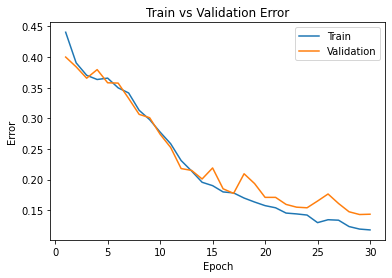

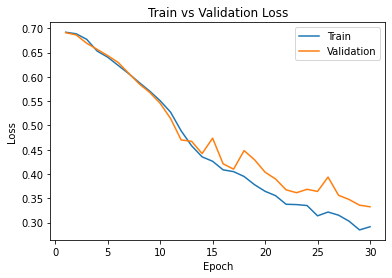

In [42]:
large_net = LargeNet()
train_net(large_net, batch_size=256, learning_rate=0.01, num_epochs=30)
large_path6 = get_model_name('large', batch_size=256, learning_rate=0.01, epoch=29)
plot_training_curve(large_path6)

## Part 4. Evaluating the Best Model 


### Part (a) 

Choose the **best** model that you have so far. This means choosing the best model checkpoint,
including the choice of `small_net` vs `large_net`, the `batch_size`, `learning_rate`, 
**and the epoch number**.

Modify the code below to load your chosen set of weights to the model object `net`.

In [43]:
#net = SmallNet()
#model_path = get_model_name(net.name, batch_size=64, learning_rate=0.01, epoch=10)
#state = torch.load(model_path)
#net.load_state_dict(state)

In [44]:
# Selected parameters
net = LargeNet()
model_path = get_model_name(net.name, batch_size=256, learning_rate=0.01, epoch=29)
state = torch.load(model_path)
net.load_state_dict(state)

<All keys matched successfully>

### Part (b) 

Justify your choice of model from part (a).

The loss value got decreased to the lowest point comparing to all the other paramters combinations. Also the error value is minimum of all the parameters combinations

### Part (c)

Using the code in Part 0, any code from lecture notes, or any code that you write,
compute and report the **test classification error** for your chosen model.

In [45]:
# If you use the `evaluate` function provided in part 0, you will need to 
# set batch_size > 1
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"], 
    batch_size=64)

Files already downloaded and verified
Files already downloaded and verified


In [46]:
criterion = nn.BCEWithLogitsLoss()

In [47]:
print("The training classification error and loss :", (evaluate(net, train_loader, criterion )))

The training classification error and loss : (0.109125, 0.2692340681552887)


In [48]:
print("The validation classification error and loss :",evaluate(net, val_loader, criterion ))

The validation classification error and loss : (0.1435, 0.33087981725111604)


In [49]:
print("The test classification error and loss :",evaluate(net, test_loader, criterion ))

The test classification error and loss : (0.134, 0.3373774094507098)


### Part (d) 

How does the test classification error compare with the **validation error**?
Explain why you would expect the test error to be *higher* than the validation error.

The validation classsification error is  very slightly greater (~ 2%) than the test classification error. It is expected that the testing error should be higher than the validation error because the hyperparameters are tuned keeping the validation set in mind while the testing set is untouched by the model. Over here, the test set is slightly lower and the reason can be noise in the model and the needs further tuning of the hyperparameters.

### Part (e) 

Why did we only use the test data set at the very end?
Why is it important that we use the test data as little as possible?

It is always a good practice to use test data set at the end just to avoid any noise in the model and check the model accuracy with an untouched data, over here is testing data set.

## Part 5. Fully-Connected Linear ANN vs CNN 

Test out a 3-layer linear fully-connected ANN architecture (see simpleANN below). You should explore different hyperparameter settings to determine how well you can do on the validation dataset. Once satisified with the performance, you may test it out on the test data.

How does the your best CNN model compare with an 3-layer linear ANN model (no convolutional layers) on classifying car and truck images?

In [50]:
class simpleANN(nn.Module):
    def __init__(self):
        super(simpleANN, self).__init__()
        self.name = "simple"
        self.fc1 = nn.Linear(32*32*3, 100)
        self.fc2 = nn.Linear(100, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.squeeze(1) # Flatten to [batch_size]

        return x

In [51]:
simple_ANN_net=simpleANN()

In [52]:
train_net(simple_ANN_net, batch_size=512, learning_rate=0.001, num_epochs=30)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.501375, Train loss: 0.693535253405571 |Validation err: 0.4395, Validation loss: 0.690090224146843
Epoch 2: Train err: 0.408375, Train loss: 0.6865849867463112 |Validation err: 0.385, Validation loss: 0.6827891916036606
Epoch 3: Train err: 0.372625, Train loss: 0.6791209019720554 |Validation err: 0.3695, Validation loss: 0.6756526231765747
Epoch 4: Train err: 0.362375, Train loss: 0.6718882359564304 |Validation err: 0.3605, Validation loss: 0.6692817062139511
Epoch 5: Train err: 0.36075, Train loss: 0.6653911210596561 |Validation err: 0.357, Validation loss: 0.6628792583942413
Epoch 6: Train err: 0.35925, Train loss: 0.6589011214673519 |Validation err: 0.352, Validation loss: 0.6575257033109665
Epoch 7: Train err: 0.357, Train loss: 0.6530201509594917 |Validation err: 0.354, Validation loss: 0.6524383276700974
Epoch 8: Train err: 0.355625, Train loss: 0.6477774567902088 |Validation err: 0.3

In [53]:
simple_path = get_model_name('simple', batch_size=512, learning_rate=0.001, epoch=29)

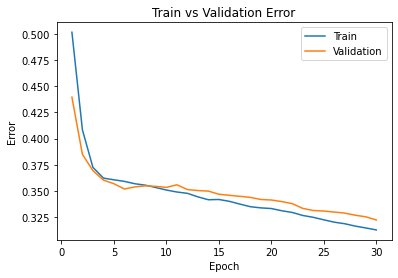

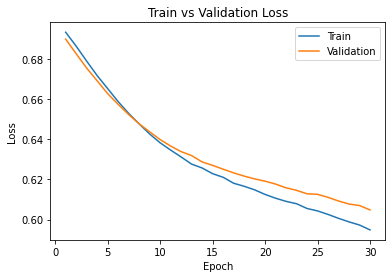

In [54]:
plot_training_curve(simple_path)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.497625, Train loss: 0.698742151260376 |Validation err: 0.5095, Validation loss: 0.6950465366244316
Epoch 2: Train err: 0.492375, Train loss: 0.6859890930354595 |Validation err: 0.4835, Validation loss: 0.6837376281619072
Epoch 3: Train err: 0.43525, Train loss: 0.6745748575776815 |Validation err: 0.41, Validation loss: 0.672428272664547
Epoch 4: Train err: 0.385125, Train loss: 0.6622622925788164 |Validation err: 0.3795, Validation loss: 0.6609191074967384
Epoch 5: Train err: 0.3615, Train loss: 0.6517401654273272 |Validation err: 0.366, Validation loss: 0.6488045826554298
Epoch 6: Train err: 0.350125, Train loss: 0.6394449137151241 |Validation err: 0.3595, Validation loss: 0.6397851556539536
Epoch 7: Train err: 0.343125, Train loss: 0.6301708072423935 |Validation err: 0.3525, Validation loss: 0.6309803426265717
Epoch 8: Train err: 0.336, Train loss: 0.6219806913286448 |Validation err: 0.3

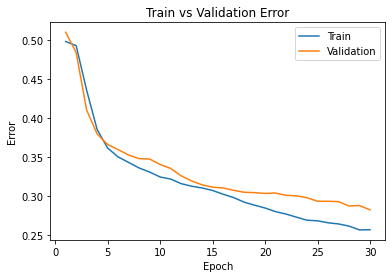

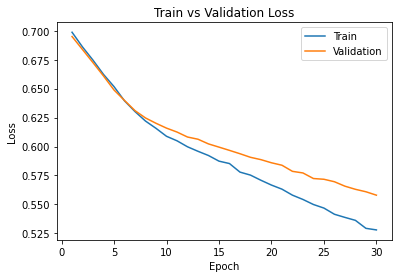

In [55]:
simple_ANN_net=simpleANN()
train_net(simple_ANN_net, batch_size=256, learning_rate=0.001, num_epochs=30)
simple_path1 = get_model_name('simple', batch_size=256, learning_rate=0.001, epoch=29)
plot_training_curve(simple_path1)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.493875, Train loss: 0.6925807216810802 |Validation err: 0.485, Validation loss: 0.6842689961194992
Epoch 2: Train err: 0.413, Train loss: 0.6690454265427968 |Validation err: 0.38, Validation loss: 0.6609395258128643
Epoch 3: Train err: 0.356, Train loss: 0.6455884102791075 |Validation err: 0.3585, Validation loss: 0.6389766521751881
Epoch 4: Train err: 0.342125, Train loss: 0.6265264238630023 |Validation err: 0.3465, Validation loss: 0.6256939396262169
Epoch 5: Train err: 0.329, Train loss: 0.6152966741531615 |Validation err: 0.3395, Validation loss: 0.6154965944588184
Epoch 6: Train err: 0.320875, Train loss: 0.6043344811787681 |Validation err: 0.3245, Validation loss: 0.6103545613586903
Epoch 7: Train err: 0.312, Train loss: 0.5959695681693062 |Validation err: 0.315, Validation loss: 0.6039341874420643
Epoch 8: Train err: 0.3055, Train loss: 0.5875001483493381 |Validation err: 0.312, Val

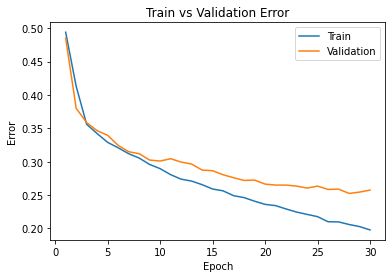

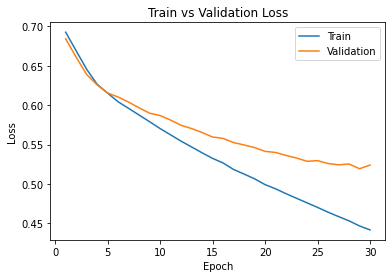

In [56]:
simple_ANN_net=simpleANN()
train_net(simple_ANN_net, batch_size=128, learning_rate=0.001, num_epochs=30)
simple_path2 = get_model_name('simple', batch_size=128, learning_rate=0.001, epoch=29)
plot_training_curve(simple_path2)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.425375, Train loss: 0.671761866658926 |Validation err: 0.3615, Validation loss: 0.6336061805486679
Epoch 2: Train err: 0.331125, Train loss: 0.6102367918938398 |Validation err: 0.3255, Validation loss: 0.6057828664779663
Epoch 3: Train err: 0.303875, Train loss: 0.5793389733880758 |Validation err: 0.2975, Validation loss: 0.5816153958439827
Epoch 4: Train err: 0.272625, Train loss: 0.5485739456489682 |Validation err: 0.2865, Validation loss: 0.5636096224188805
Epoch 5: Train err: 0.252875, Train loss: 0.5254314038902521 |Validation err: 0.281, Validation loss: 0.5509977713227272
Epoch 6: Train err: 0.2435, Train loss: 0.5051312083378434 |Validation err: 0.2635, Validation loss: 0.5310516059398651
Epoch 7: Train err: 0.220125, Train loss: 0.47625751700252295 |Validation err: 0.26, Validation loss: 0.5272772423923016
Epoch 8: Train err: 0.211875, Train loss: 0.45934320613741875 |Validation e

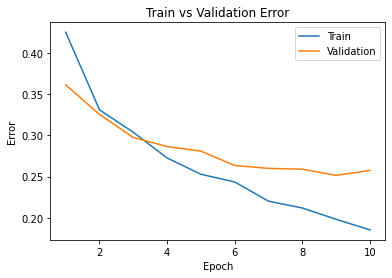

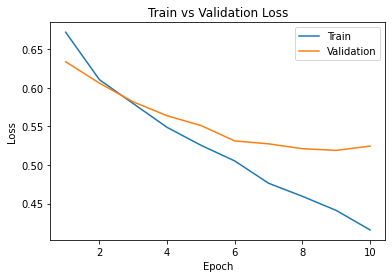

In [57]:
simple_ANN_net=simpleANN()
train_net(simple_ANN_net, batch_size=256, learning_rate=0.01, num_epochs=10)
simple_path3 = get_model_name('simple', batch_size=256, learning_rate=0.01, epoch=9)
plot_training_curve(simple_path3)

In [58]:
# Will go with the parameters: batch_size=256, learning_rate=0.001, num_epochs=30, to validatet the test dataset

# Selected parameters
simple_net = simpleANN()
model_path = get_model_name(simple_net.name, batch_size=256, learning_rate=0.001, epoch=29)
state = torch.load(model_path)
simple_net.load_state_dict(state)


<All keys matched successfully>

In [59]:
print("The validation classification error and loss :",evaluate(simple_net, val_loader, criterion ))

The validation classification error and loss : (0.2825, 0.5566548677161336)


In [60]:
print("The test classification error and loss :",evaluate(simple_net, test_loader, criterion ))

The test classification error and loss : (0.278, 0.5505938045680523)


The CNN network works better with the provided dataset compared with the 3 layer ANN network.

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [62]:
%%shell
jupyter nbconvert --to html /content/LAB_1_ANN_and_PyTorch.ipynb

[NbConvertApp] Converting notebook /content/LAB_1_ANN_and_PyTorch.ipynb to html
[NbConvertApp] Writing 1439990 bytes to /content/LAB_1_ANN_and_PyTorch.html


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus